In [26]:
from pybaseball import plot_stadium
from pybaseball import spraychart
from pybaseball import statcast
from pybaseball import playerid_lookup
from pybaseball import statcast_pitcher
from pybaseball import statcast_batter

In [42]:
from datetime import date
import pandas as pd
import numpy as np
import csv
today = date.today().strftime("%Y-%m-%d")

In [30]:
players = pd.read_csv("PlayerIDMap.csv")

In [49]:
player_id = playerid_lookup('ohtani','shohei')['key_mlbam'][0]

In [50]:
player_team = players[players['MLBID']==player_id].iloc[0]['TEAM']

In [51]:
with open('team_lookup.csv') as f:
    next(f) 
    reader = csv.reader(f, skipinitialspace=True) # convert CSV to dict
    team_dict = dict(reader)
    print(team_dict)

{'LAA': 'Angels', 'HOU': 'Astros', 'OAK': 'Athletics', 'TOR': 'Blue Jays', 'ATL': 'Braves', 'MIL': 'Brewers', 'STL': 'Cardinals', 'CHC': 'Cubs', 'ARI': 'Diamondbacks', 'LAD': 'Dodgers', 'SF': 'Giants', 'CLE': 'Indians', 'SEA': 'Mariners', 'MIA': 'Marlins', 'NYM': 'Mets', 'WAS': 'Nationals', 'BAL': 'Orioles', 'SD': 'Padres', 'PHI': 'Phillies', 'PIT': 'Pirates', 'TEX': 'Rangers', 'TB': 'Rays', 'BOS': 'Red Sox', 'CIN': 'Reds', 'COL': 'Rockies', 'KC': 'Royals', 'DET': 'Tigers', 'MIN': 'Twins', 'CHW': 'White Sox', 'NYY': 'Yankees'}


In [52]:
player_team_name = '_'.join(team_dict[player_team].split()).lower()

In [53]:
data = statcast_batter('2021-03-01', today, player_id)

Gathering Player Data


In [54]:
#regular season in playballs at home
data_filt = data[(data.game_type =='R') & (data.type=='X') & (data.home_team==player_team)] 

In [55]:
data_filt

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,...,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp
102,FC,2021-09-26,86.7,2.39,5.54,"Ohtani, Shohei",660271,594835,single,hit_into_play,...,0,0,1,1,0,Infield shift,Standard,140.0,0.031,0.413
105,SI,2021-09-26,87.6,2.15,5.80,"Ohtani, Shohei",660271,594835,field_out,hit_into_play,...,0,0,1,1,0,Infield shift,Standard,142.0,-0.009,-0.091
111,SI,2021-09-26,88.8,2.10,5.81,"Ohtani, Shohei",660271,594835,force_out,hit_into_play,...,0,0,0,0,0,Infield shift,Standard,145.0,-0.033,-0.617
117,FC,2021-09-25,81.1,3.36,4.82,"Ohtani, Shohei",660271,542881,triple,hit_into_play,...,1,1,4,4,1,Infield shift,Standard,197.0,0.097,1.378
138,CH,2021-09-25,80.3,2.65,5.94,"Ohtani, Shohei",660271,542881,triple,hit_into_play,...,0,0,1,1,0,Infield shift,Standard,118.0,0.143,1.644
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2563,FF,2021-04-02,97.3,-1.82,6.11,"Ohtani, Shohei",660271,521230,home_run,hit_into_play,...,12,12,8,8,12,Standard,Standard,204.0,0.001,1.783
2574,SI,2021-04-02,87.7,1.42,6.20,"Ohtani, Shohei",660271,572971,triple,hit_into_play,...,0,0,0,0,0,Infield shift,Strategic,136.0,0.071,0.705
2581,SL,2021-04-01,86.9,-1.79,6.43,"Ohtani, Shohei",660271,608337,field_out,hit_into_play,...,3,3,2,2,3,Infield shift,Standard,189.0,-0.040,-0.230
2584,FF,2021-04-01,94.2,-1.59,6.40,"Ohtani, Shohei",660271,608337,field_out,hit_into_play,...,1,1,0,0,1,Infield shift,Standard,201.0,-0.022,-0.163


/Users/jackguebert/opt/anaconda3/lib/python3.9/site-packages/pybaseball/plotting.py:114: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sub_data = sub_data[sub_data['events'].notna()][sub_data['hc_x'].notna()][sub_data['hc_y'].notna()]


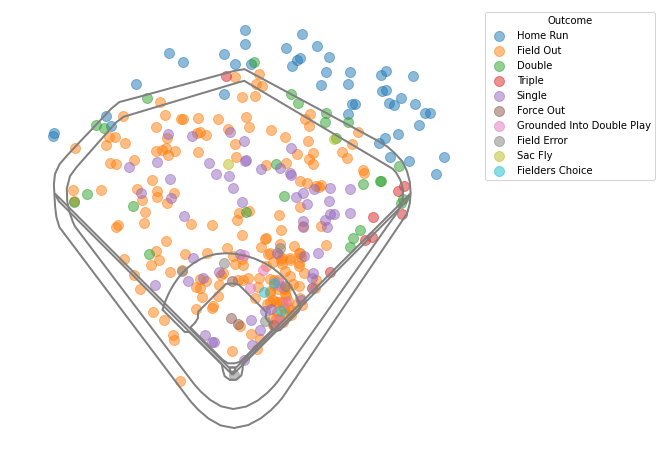

<Axes:>

In [56]:
spraychart(data, player_team_name, title='', 
           tooltips=[], size=100, colorby='events', 
           legend_title='', width=500, height=500)